# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# !pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# 데이터 로드

In [2]:
df_esg = pd.read_parquet('data_0205/esgRating.parquet')
display(df_esg.shape)
df_esg.head(2)

(5654, 11)

,종목코드,종목명,연,ESG종합,E,S,G,ESG종합_enc,E_enc,S_enc,G_enc
0,None,서울도시가스,2018,B,B,B,B,2,2,2,2
1,None,티비에이치글로벌,2018,B,B,B,B,2,2,2,2


In [3]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5654 entries, 0 to 5653
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   종목코드       4265 non-null   object
 1   종목명        5654 non-null   object
 2   연          5654 non-null   object
 3   ESG종합      5453 non-null   object
 4   E          5650 non-null   object
 5   S          5493 non-null   object
 6   G          5301 non-null   object
 7   ESG종합_enc  5453 non-null   object
 8   E_enc      5650 non-null   object
 9   S_enc      5493 non-null   object
 10  G_enc      5301 non-null   object
dtypes: object(11)
memory usage: 486.0+ KB


In [4]:
df_esg.isnull().sum()

종목코드         1389
종목명             0
연               0
ESG종합         201
E               4
S             161
G             353
ESG종합_enc     201
E_enc           4
S_enc         161
G_enc         353
dtype: int64

# ESG종합_enc(범주형) 시각화

## 전체 기간 중 ESG종합_enc 등급 개수

In [200]:
temp = df_esg['ESG종합_enc'].value_counts()
temp

2    4386
3     722
4     295
5      50
Name: ESG종합_enc, dtype: int64

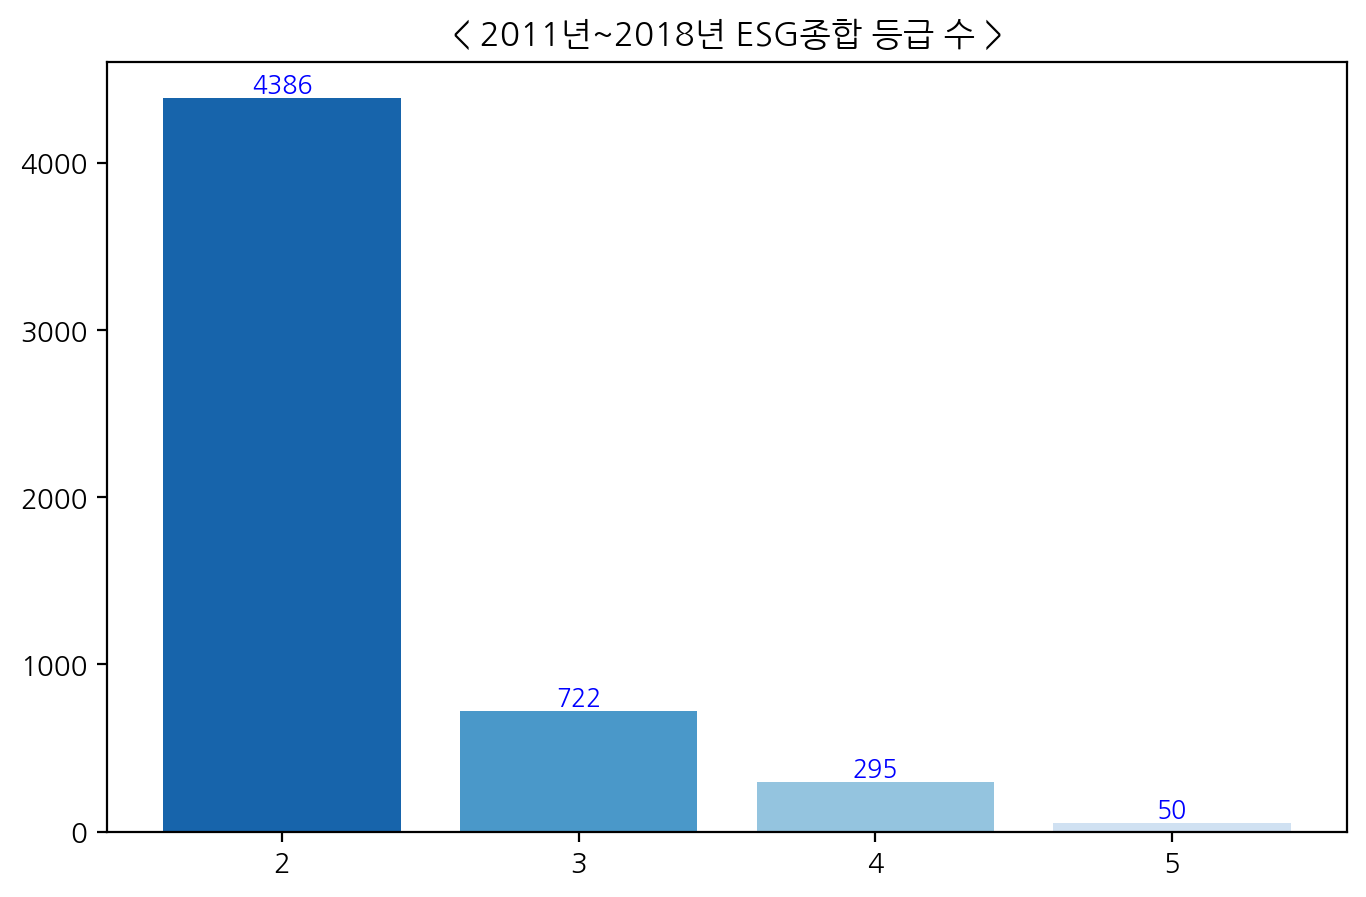

In [246]:
x = temp.keys().to_list() # ['2', '3', '4', '5']
y = temp.values.tolist() # [4386, 722, 295, 50]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
colors = sns.color_palette('Blues_r', len(x)) ## 바 차트 색상
plt.bar(x,y, color=colors)
plt.title('< 2011년~2018년 ESG종합 등급 수 >')

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

## 전체 기간 중 ESG종합_enc 등급 비율

In [157]:
temp_total = pd.DataFrame(df_esg['ESG종합_enc'].value_counts())
temp_total['ratio'] = df_esg['ESG종합_enc'].value_counts() / df_esg['ESG종합_enc'].count()
temp_total = temp_total.reset_index()
temp_total = temp_total.rename(columns= {'index':'등급'})
temp_total

,등급,ESG종합_enc,ratio
0,2,4386,0.804328
1,3,722,0.132404
2,4,295,0.054099
3,5,50,0.009169


In [268]:
a = temp_total.sort_values(by='ratio')
a

,등급,ESG종합_enc,ratio
3,5,50,0.009169
2,4,295,0.054099
1,3,722,0.132404
0,2,4386,0.804328


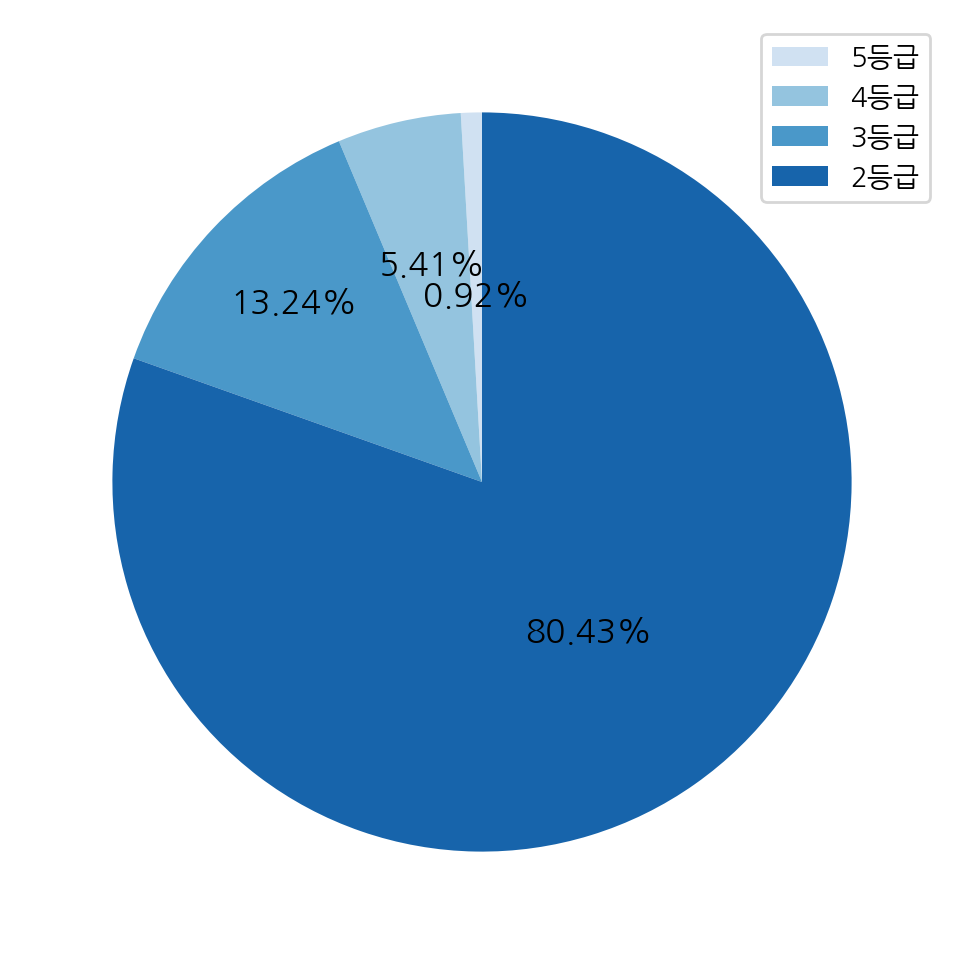

In [332]:
fig = plt.figure(figsize=(6,6)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       colors = sns.color_palette('Blues', len(a)), ## 색상 지정
       )
 

threshold = 0.2
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 0.5보다 작은 라벨의 개수
spacing = 0.1
for i, value in enumerate(list(a['ratio'])):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i] < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(list(a['ratio'])) - 1:
        sum_pct += float(f'{sorted_frequency[i]*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)

plt.legend(pie[0], sorted_labels) ## 범례
plt.show()

## 연도별 ESG종합_enc 등급 개수 

In [344]:
df_esg_sort = df_esg.sort_values(by='연')
df_esg_sort.head(2)

,종목코드,종목명,연,ESG종합,E,S,G,ESG종합_enc,E_enc,S_enc,G_enc
5653,006840,AK홀딩스,2011,B,B,B,B,2,2,2,2
5211,079160,CJ CGV,2011,B,B,B,None,2,2,2,None


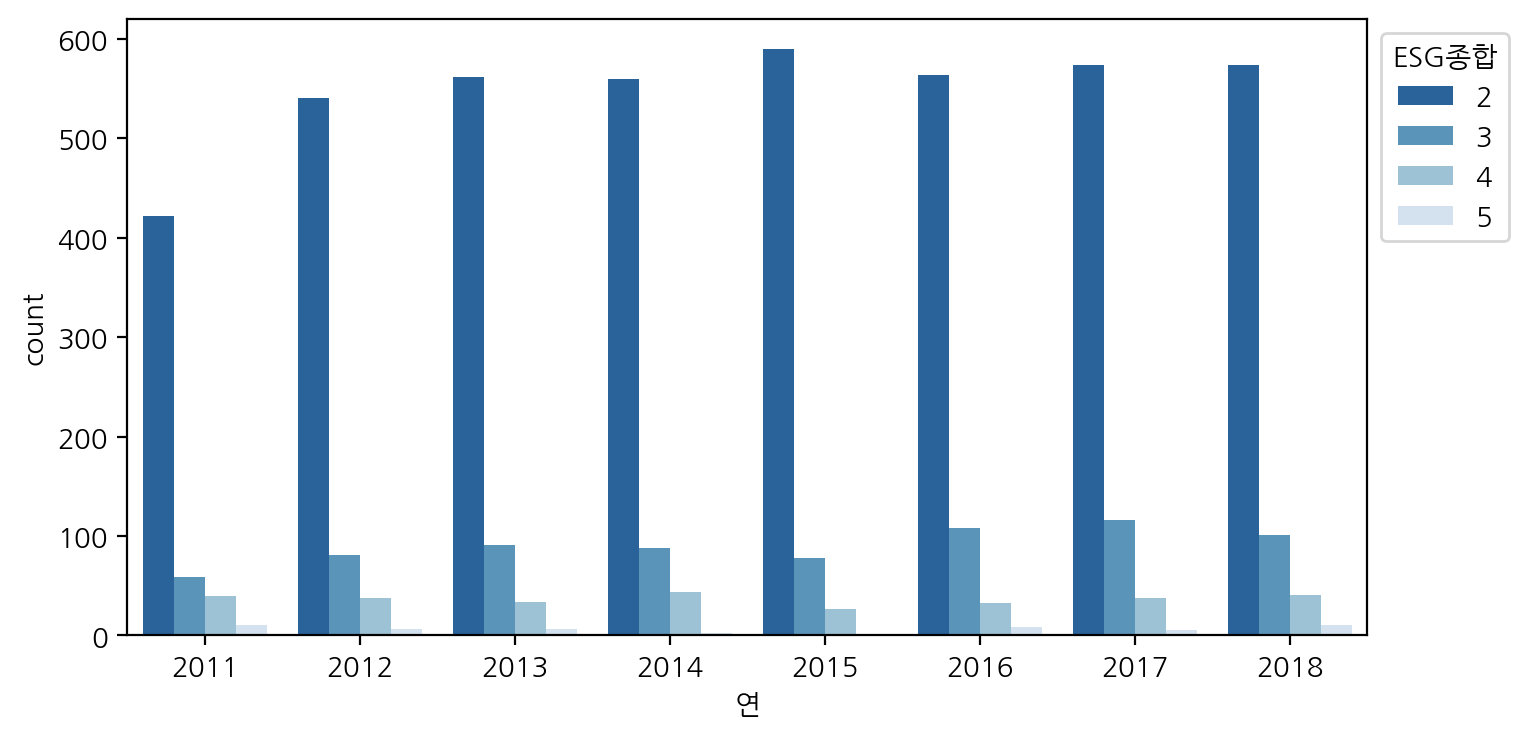

In [350]:
colors = sns.color_palette('Blues_r', 4) ## 바 차트 색상

plt.figure(figsize= (8,4))
sns.countplot(x='연', hue='ESG종합_enc', data=df_esg_sort, palette=colors)
plt.legend(bbox_to_anchor=(1, 1), title= 'ESG종합')

# E_enc(범주형) 시각화

## 전체 기간 중 E_enc 등급수 시각화

In [358]:
temp_e = df_esg['E_enc'].value_counts()
temp_e

2    2545
1    1653
3     951
4     280
0     119
5     101
6       1
Name: E_enc, dtype: int64

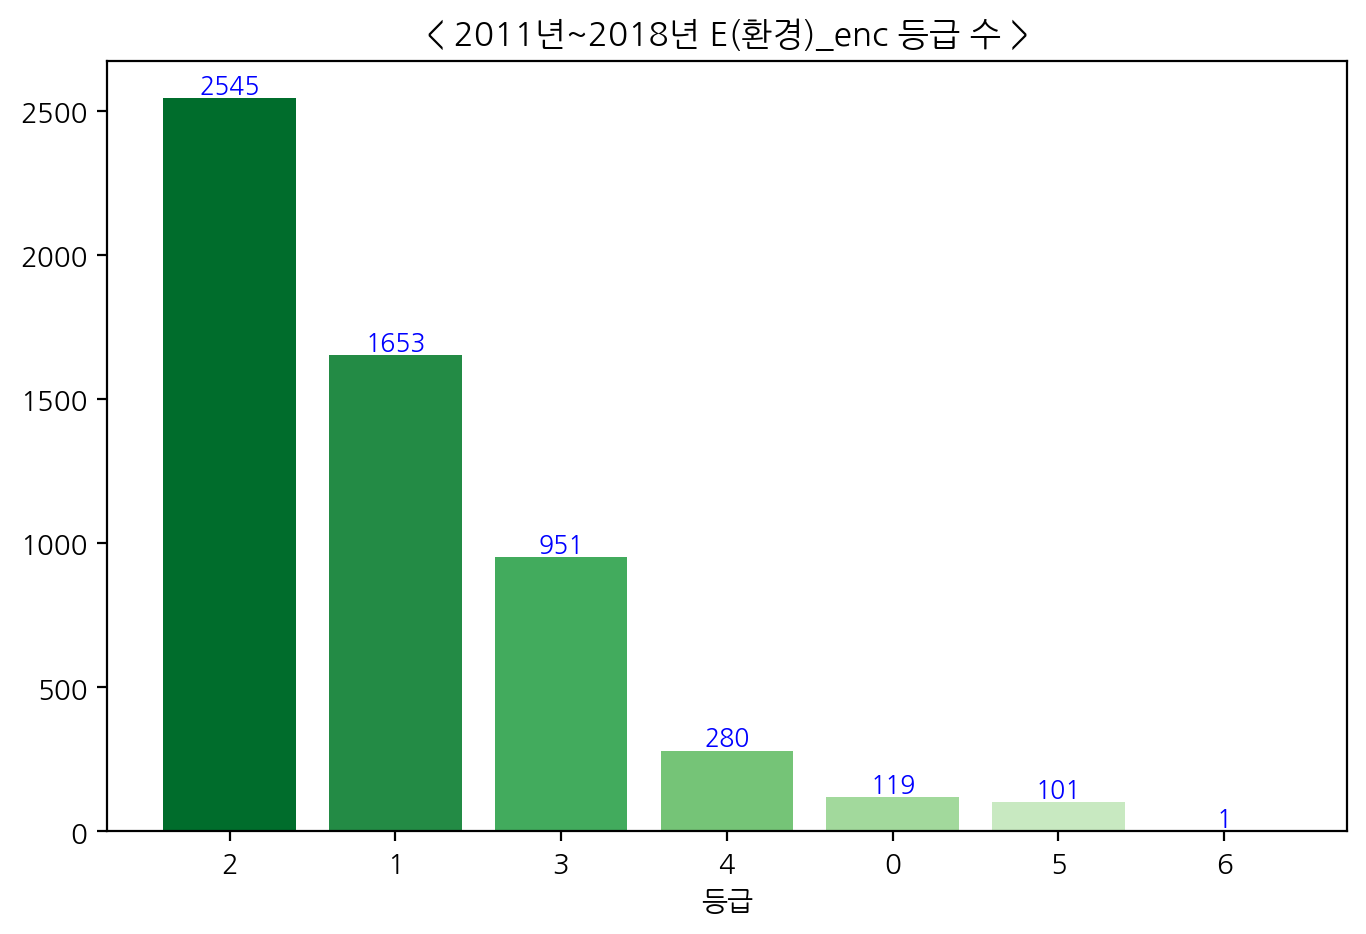

In [402]:
x = temp_e.keys().to_list() # ['2', '1', '3', '4', '0', '5', '6']
y = temp_e.values.tolist() # [2545, 1653, 951, 280, 119, 101, 1]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
colors = sns.color_palette('Greens_r', len(x)) ## 바 차트 색상
plt.bar(x,y, color=colors)
plt.title('< 2011년~2018년 E(환경)_enc 등급 수 >')

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    
plt.xlabel('등급')
plt.show()

## 전체 기간 중 E(환경)_enc 등급 비율

In [366]:
temp_E = pd.DataFrame(df_esg['E_enc'].value_counts())
temp_E['ratio'] = df_esg['E_enc'].value_counts() / df_esg['E_enc'].count()
temp_E = temp_E.reset_index()
temp_E = temp_E.rename(columns= {'index':'등급'})
temp_E

,등급,E_enc,ratio
0,2,2545,0.450442
1,1,1653,0.292566
2,3,951,0.168319
3,4,280,0.049558
4,0,119,0.021062
5,5,101,0.017876
6,6,1,0.000177


In [408]:
b = temp_E.sort_values(by='ratio')
b

,등급,E_enc,ratio
6,6,1,0.000177
5,5,101,0.017876
4,0,119,0.021062
3,4,280,0.049558
2,3,951,0.168319
1,1,1653,0.292566
0,2,2545,0.450442


In [413]:
sorted_frequency = list(b['ratio'])
sorted_frequency

[0.00017699115044247788,
 0.017876106194690267,
 0.021061946902654866,
 0.049557522123893805,
 0.16831858407079647,
 0.2925663716814159,
 0.4504424778761062]

In [414]:
sorted_labels = [i+'등급' for i in list(b['등급'])]
sorted_labels

['6등급', '5등급', '0등급', '4등급', '3등급', '1등급', '2등급']

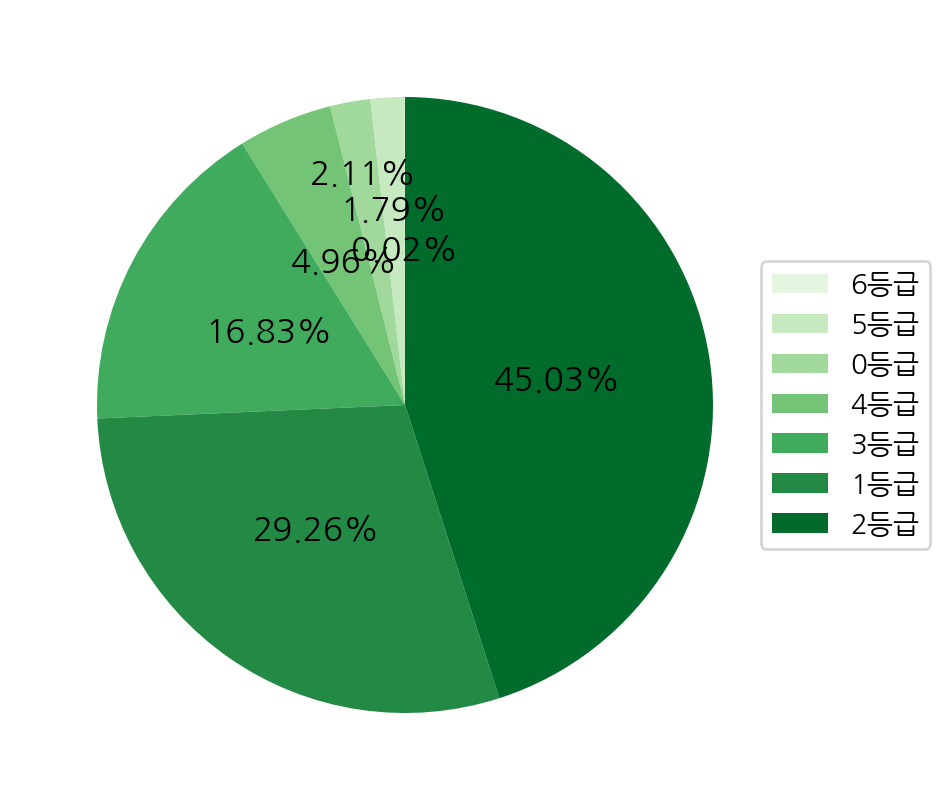

In [449]:
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
color = sns.color_palette('Greens', len(b))

pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       colors = color, ## 색상 지정
       )
 

threshold = 0.04
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 0.5보다 작은 라벨의 개수
spacing = 0.13
for i, value in enumerate(sorted_frequency):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i] < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(sorted_frequency) - 1:
        sum_pct += float(f'{sorted_frequency[i]*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)

plt.legend(pie[0], sorted_labels, loc='right', bbox_to_anchor=(1.2, 0.5)) ## 범례
plt.show()

## 연도별 E_enc 등급 개수

In [453]:
df_esg_sort = df_esg.sort_values(by='연')
df_esg_sort.head(2)

,종목코드,종목명,연,ESG종합,E,S,G,ESG종합_enc,E_enc,S_enc,G_enc
5653,006840,AK홀딩스,2011,B,B,B,B,2,2,2,2
5211,079160,CJ CGV,2011,B,B,B,None,2,2,2,None


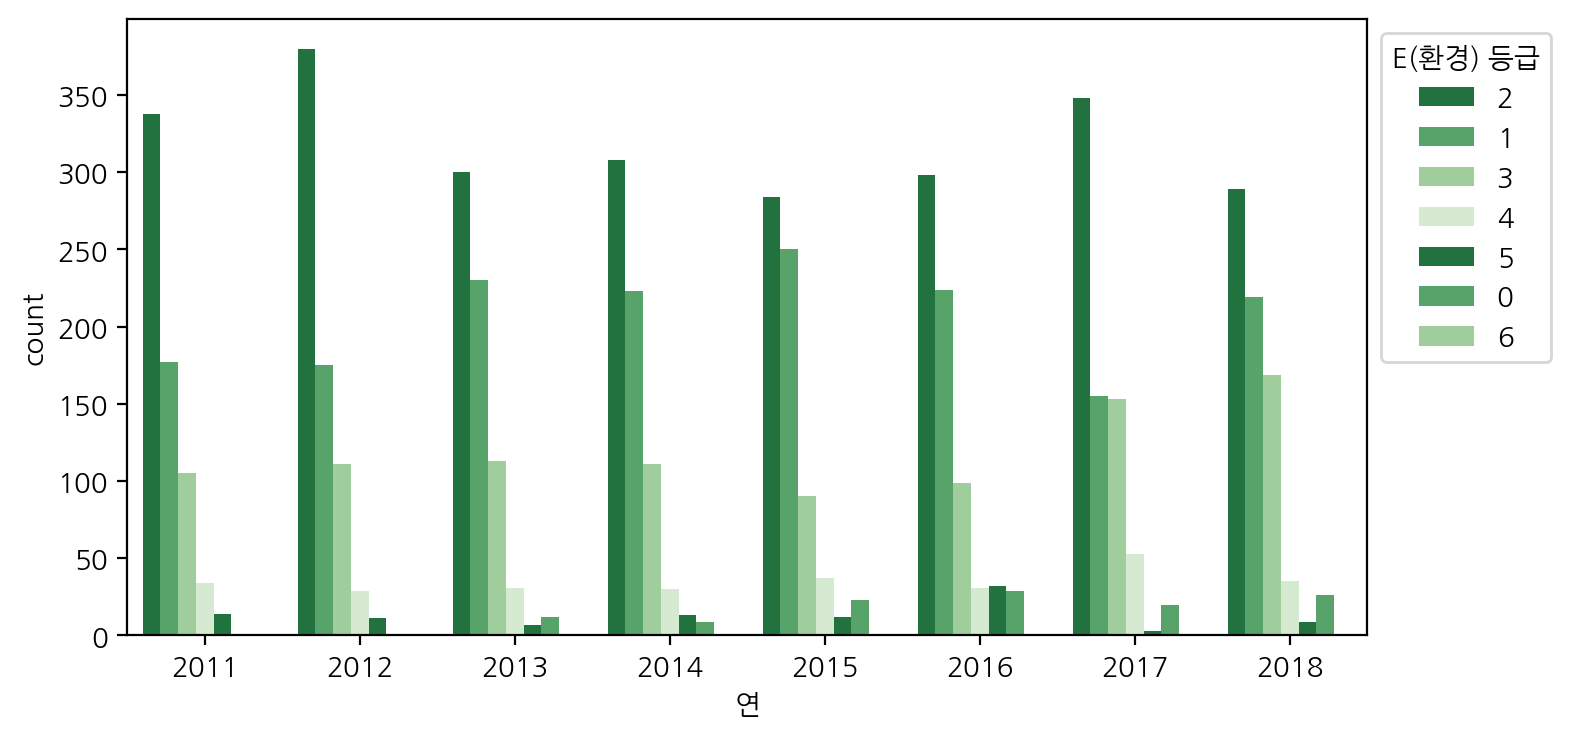

In [454]:
colors = sns.color_palette('Greens_r', 4) ## 바 차트 색상

plt.figure(figsize= (8,4))
sns.countplot(x='연', hue='E_enc', data=df_esg_sort, palette=colors)
plt.legend(bbox_to_anchor=(1, 1), title= 'E(환경) 등급')

# S_enc(범주형) 시각화
## 전체 기간 중 S_enc 등급수 시각화

In [456]:
temp_s = df_esg['S_enc'].value_counts()
temp_s

2    4229
3     768
4     355
5     141
Name: S_enc, dtype: int64

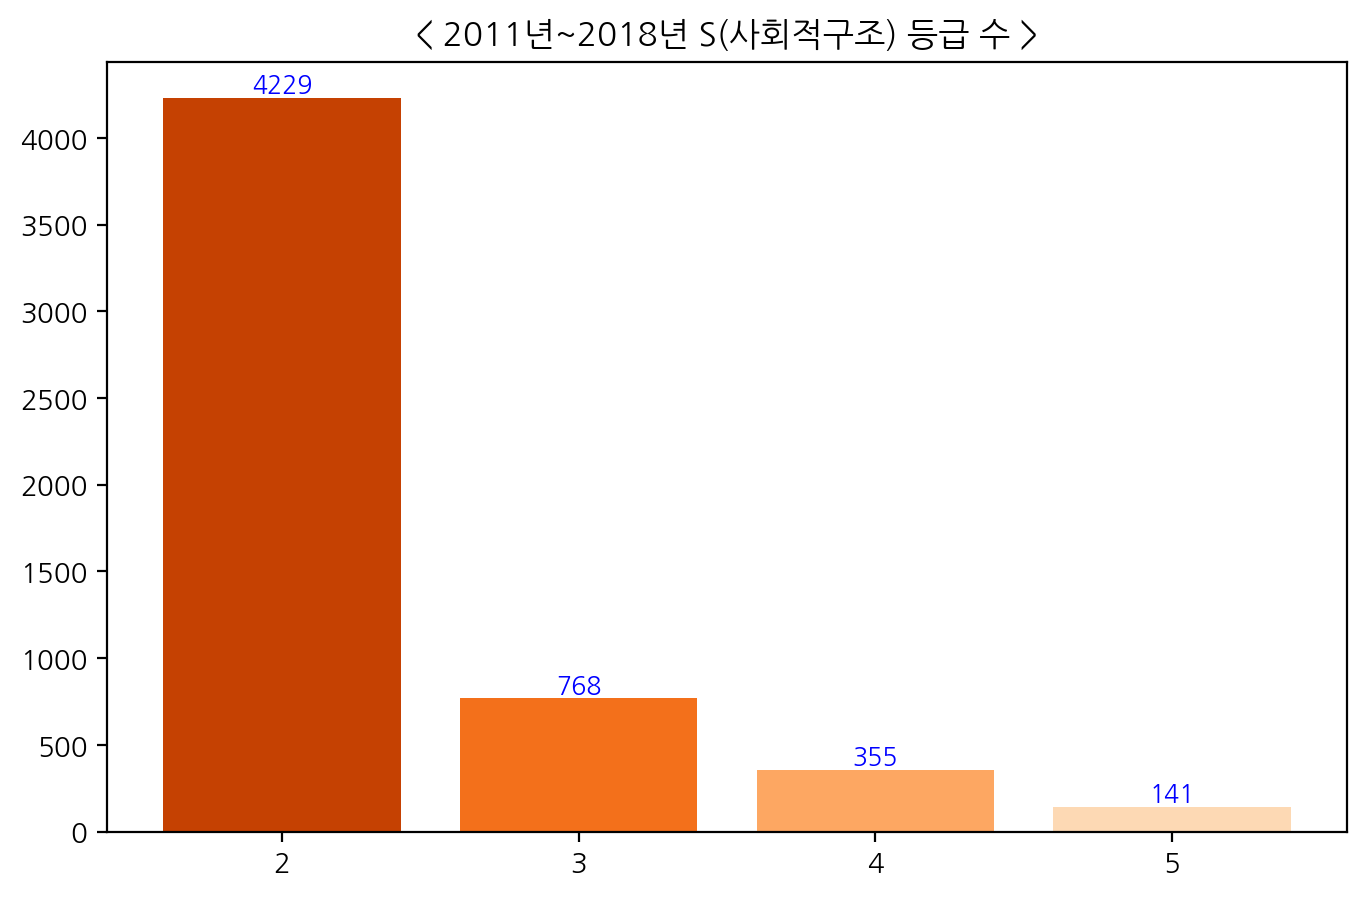

In [459]:
x = temp_s.keys().to_list() # ['2', '3', '4', '5']
y = temp_s.values.tolist() # [4229, 768, 355, 141]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
colors = sns.color_palette('Oranges_r', len(x)) ## 바 차트 색상
plt.bar(x,y, color=colors)
plt.title('< 2011년~2018년 S(사회적구조) 등급 수 >')

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

## 전체 기간 중 S(사회적구조)_enc 등급 비율

In [460]:
temp_S = pd.DataFrame(df_esg['S_enc'].value_counts())
temp_S['ratio'] = df_esg['S_enc'].value_counts() / df_esg['S_enc'].count()
temp_S = temp_S.reset_index()
temp_S = temp_S.rename(columns= {'index':'등급'})
temp_S

,등급,S_enc,ratio
0,2,4229,0.769889
1,3,768,0.139814
2,4,355,0.064628
3,5,141,0.025669


In [463]:
sorted_frequency = list(temp_S['ratio'])
sorted_frequency

[0.7698889495721828,
 0.13981430912069906,
 0.0646277079919898,
 0.025669033315128344]

In [464]:
sorted_labels = [i+'등급' for i in list(temp_S['등급'])]
sorted_labels

['2등급', '3등급', '4등급', '5등급']

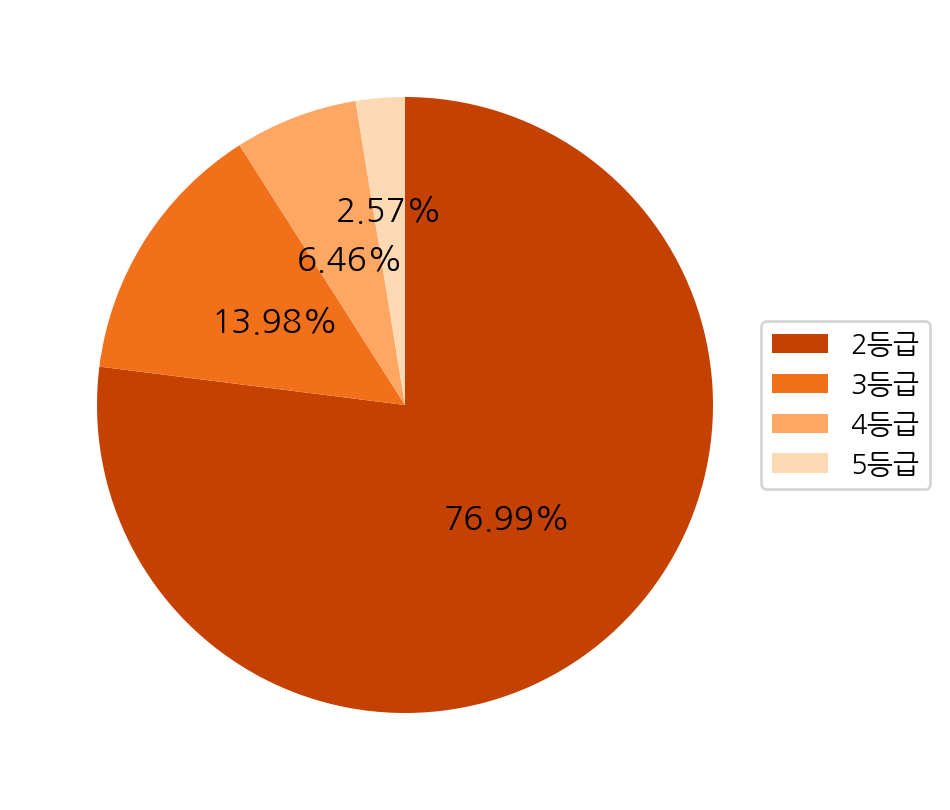

In [468]:
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
color = sns.color_palette('Oranges_r', len(temp_S))

pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = color, ## 색상 지정
       )
 

threshold = 0.07
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 0.7보다 작은 라벨의 개수
spacing = 0.13
for i, value in enumerate(sorted_frequency):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i] < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(sorted_frequency) - 1:
        sum_pct += float(f'{sorted_frequency[i]*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)

plt.legend(pie[0], sorted_labels, loc='right', bbox_to_anchor=(1.2, 0.5)) ## 범례
plt.show()

## 연도별 S_enc 등급 개수

In [469]:
df_esg_sort = df_esg.sort_values(by='연')
df_esg_sort.head(2)

,종목코드,종목명,연,ESG종합,E,S,G,ESG종합_enc,E_enc,S_enc,G_enc
5653,006840,AK홀딩스,2011,B,B,B,B,2,2,2,2
5211,079160,CJ CGV,2011,B,B,B,None,2,2,2,None


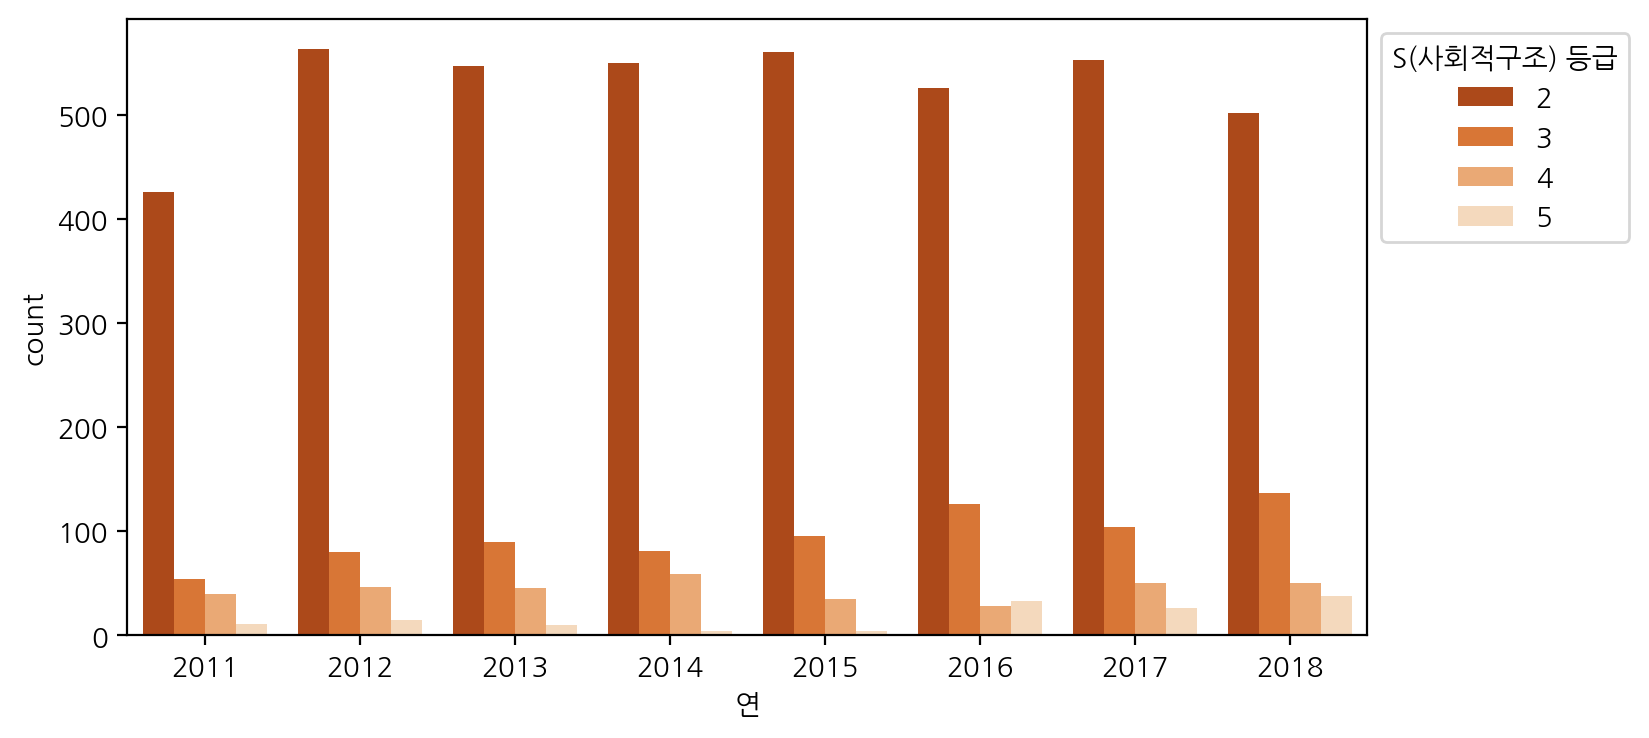

In [470]:
colors = sns.color_palette('Oranges_r', 4) ## 바 차트 색상

plt.figure(figsize= (8,4))
sns.countplot(x='연', hue='S_enc', data=df_esg_sort, palette=colors)
plt.legend(bbox_to_anchor=(1, 1), title= 'S(사회적구조) 등급')

# G_enc(범주형) 시각화

## 전체 기간 중 G_enc 등급수 시각화

In [471]:
temp_g = df_esg['G_enc'].value_counts()
temp_g

2    3908
3     986
4     357
5      50
Name: G_enc, dtype: int64

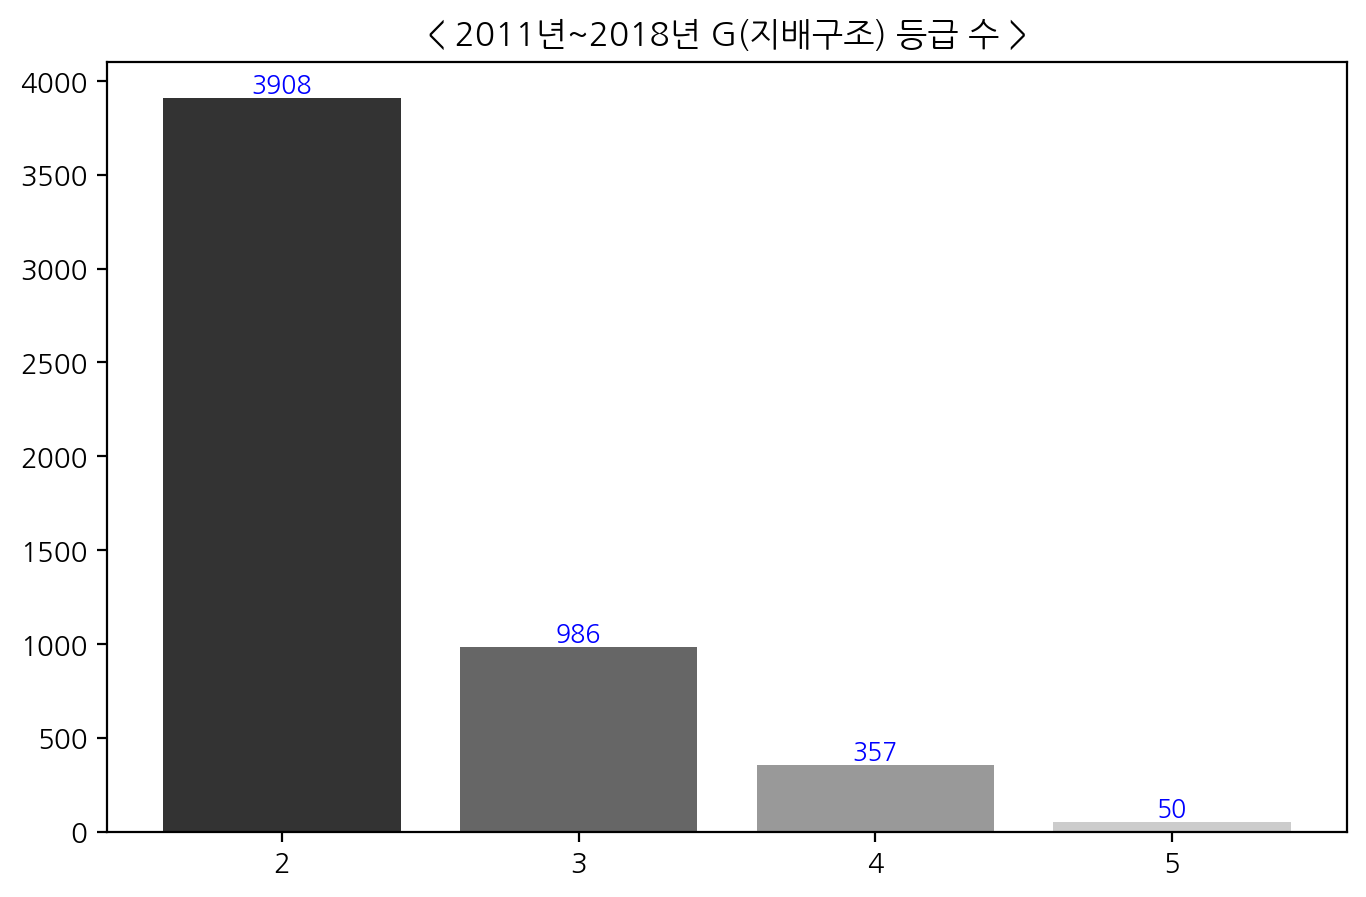

In [482]:
x = temp_g.keys().to_list() # ['2', '3', '4', '5']
y = temp_g.values.tolist() # [3908, 986, 357, 50]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
colors = sns.color_palette('gray', len(x)) ## 바 차트 색상
plt.bar(x,y, color=colors)
plt.title('< 2011년~2018년 G(지배구조) 등급 수 >')

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

## 전체 기간 중 G(지배구조)_enc 등급 비율

In [483]:
temp_G = pd.DataFrame(df_esg['G_enc'].value_counts())
temp_G['ratio'] = df_esg['G_enc'].value_counts() / df_esg['G_enc'].count()
temp_G = temp_G.reset_index()
temp_G = temp_G.rename(columns= {'index':'등급'})
temp_G

,등급,G_enc,ratio
0,2,3908,0.737219
1,3,986,0.186003
2,4,357,0.067346
3,5,50,0.009432


In [484]:
sorted_frequency = list(temp_G['ratio'])
sorted_frequency

[0.7372193925674401,
 0.18600264101112998,
 0.06734578381437464,
 0.009432182607055273]

In [485]:
sorted_labels = [i+'등급' for i in list(temp_G['등급'])]
sorted_labels

['2등급', '3등급', '4등급', '5등급']

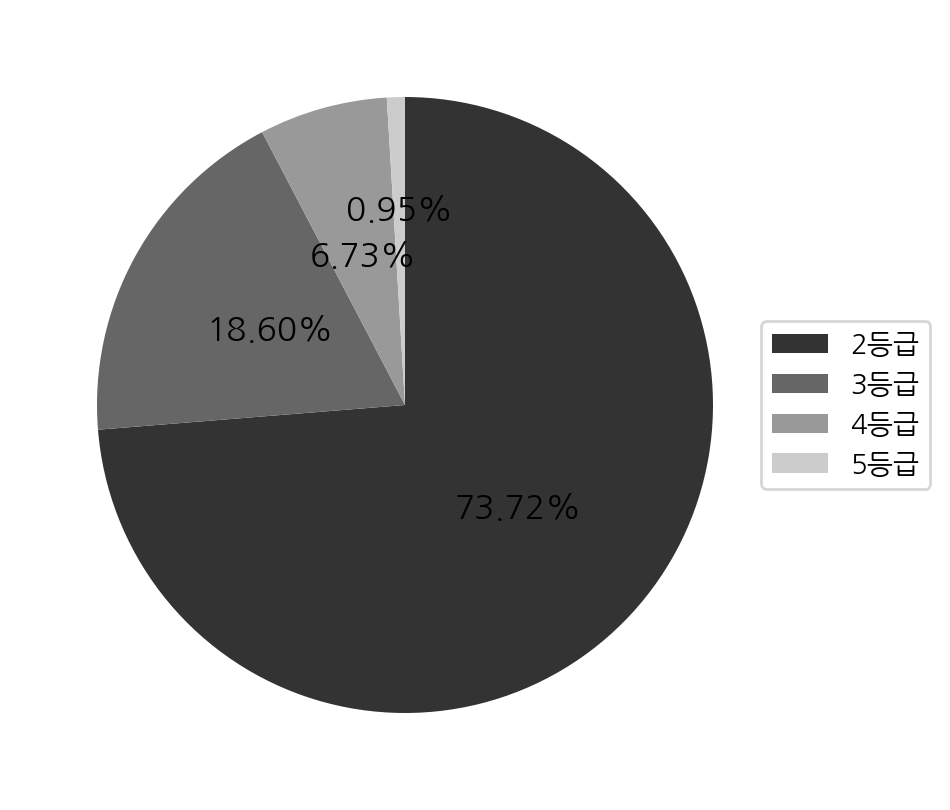

In [486]:
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
color = sns.color_palette('gray', len(temp_G))

pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = color, ## 색상 지정
       )
 

threshold = 0.07
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 0.7보다 작은 라벨의 개수
spacing = 0.13
for i, value in enumerate(sorted_frequency):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i] < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(sorted_frequency) - 1:
        sum_pct += float(f'{sorted_frequency[i]*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)

plt.legend(pie[0], sorted_labels, loc='right', bbox_to_anchor=(1.2, 0.5)) ## 범례
plt.show()

## 연도별 G_enc 등급 개수

In [489]:
df_esg_sort = df_esg.sort_values(by='연')
df_esg_sort.head(2)

,종목코드,종목명,연,ESG종합,E,S,G,ESG종합_enc,E_enc,S_enc,G_enc
5653,006840,AK홀딩스,2011,B,B,B,B,2,2,2,2
5211,079160,CJ CGV,2011,B,B,B,None,2,2,2,None


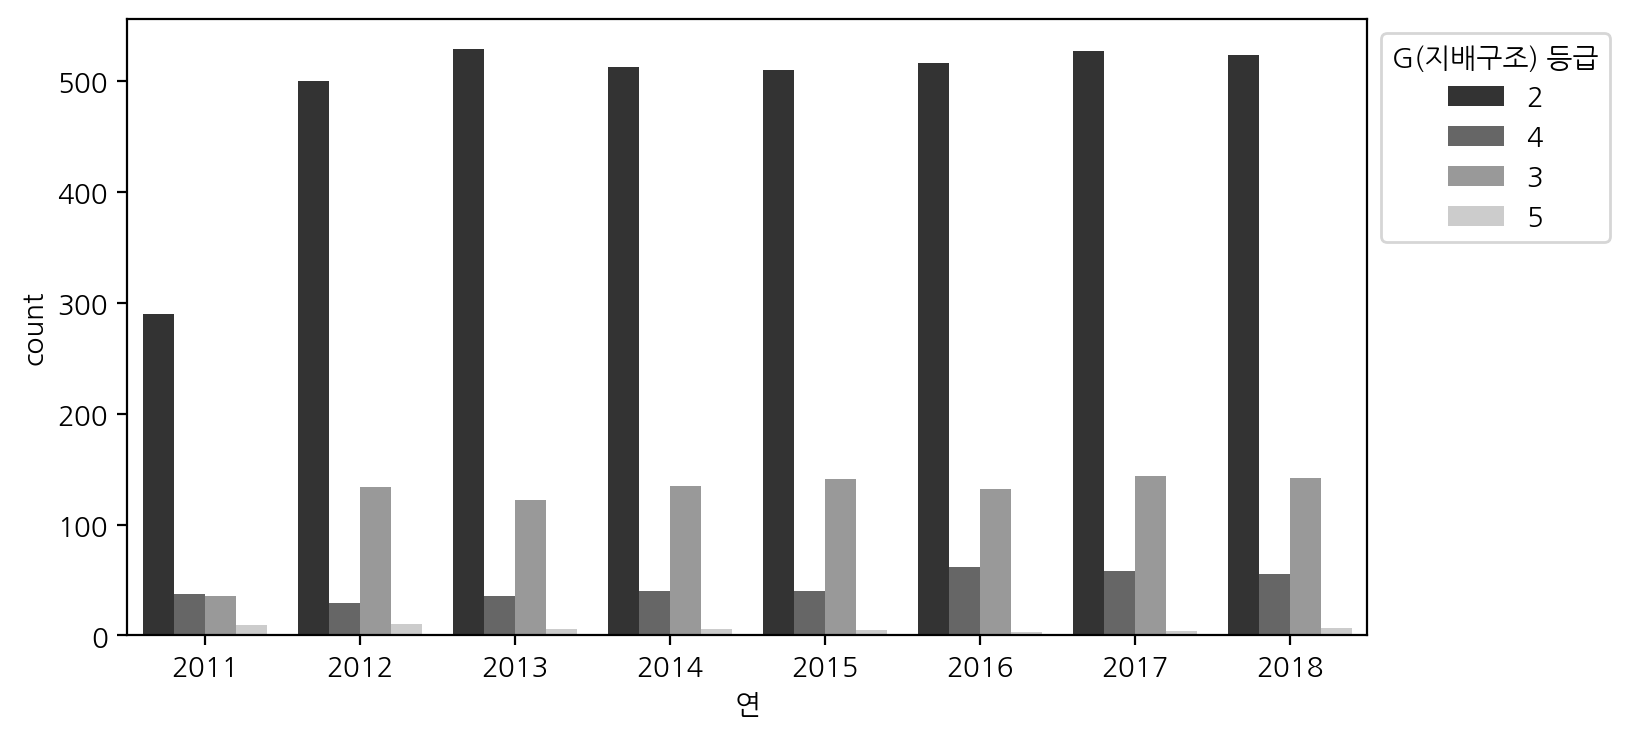

In [490]:
colors = sns.color_palette('gray', 4) ## 바 차트 색상

plt.figure(figsize= (8,4))
sns.countplot(x='연', hue='G_enc', data=df_esg_sort, palette=colors)
plt.legend(bbox_to_anchor=(1, 1), title= 'G(지배구조) 등급')